In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [21]:
def load_plotdata(filename):
    with h5py.File(filename, "r") as f:
        Acont_slice = np.array(f["qttdata2D"])
        qocont_slice = np.array(f["qplotmesh"])
        ocont = np.array(f["ωcont"])
        ocont_slice = np.zeros(len(qocont_slice))
        for i in range(len(qocont_slice)):
            ocont_slice[i] = ocont[qocont_slice[i]-1]
        linkdims = np.array(f["linkdims"])
        pivoterrors = np.array(f["pivoterrors"])
    return Acont_slice, ocont_slice, linkdims, pivoterrors

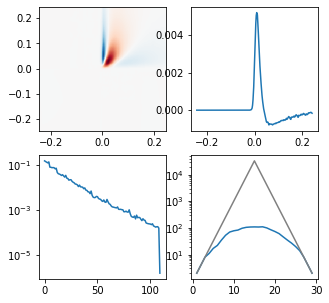

In [43]:
filename = "../data/plotdata_4pPSFs1.h5"
Acont_slice, ocont_slice, linkdims, pivoterrors = load_plotdata(filename)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5,5))

maxmax = np.max(np.abs(Acont_slice))
N = 99
axs[0, 0].pcolormesh(ocont_slice, ocont_slice, Acont_slice, vmin=-maxmax, vmax=maxmax, cmap="RdBu_r")
axs[0, 1].plot(ocont_slice, Acont_slice[len(ocont_slice)//2])

dR = len(linkdims)+1
axs[1, 0].plot(pivoterrors)
axs[1, 1].plot(np.arange(1,dR), linkdims)
axs[1, 1].plot(np.arange(1,dR), np.power(2., np.min(np.vstack((np.arange(1,dR), np.arange(dR-1,0,-1))), axis=0)), color="grey")

for i in range(2):
    axs[1, i].set_yscale("log")



In [39]:
# np.power(2., np.min(np.vstack((np.arange(1,dR+1), np.arange(dR,0,-1))))
          
np.min(np.vstack((np.arange(1,dR), np.arange(dR-1,0,-1))), axis=0)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])